# FIT5196 Assessment 3
#### Student Name: Roopesh Kumar Ramesh, Nikita Mary John
#### Student ID: 30344565, 30142776

Date: 07/10/2019

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: 
* pandas (for dataframe, included in Anaconda Python 3) 
* numpy (for numpy array, included in Anaconda Python 3) 
* datetime (for dates)
* networkx (for shortest path and Djikstra algorithm)


## Introduction

We have been provided with three files- Dirty data, Outlier data and Missing data. Each having inconsistances in the data. The aim of this assignment is to identify the errors and rectify them. Each data file has 500 entries.

NOTE: In order for the following code to run, the input text file must be stored in the same folder as this file.

## 1.  Import libraries 

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from ast import literal_eval
from datetime import datetime
import timestring
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## 2. Data Cleansing 

### 1. Dirty Data

This file contains data that has a number of Syntactic and Semantic Anomalies. We need to go throught this data a find these errors and correct them

In [2]:
dirty_data = pd.read_csv('Group017_dirty_data.csv') #reading in the file

In [3]:
dirty_data.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,496.215100,-30.753928,143.504939,0.122000,8.821536,13.909427
std,285.920345,25.336588,16.298470,0.327614,1.721933,2.492537
min,29.500000,-37.833482,-37.809475,0.000000,3.554000,4.416368
25%,268.750000,-37.818139,144.949985,0.000000,7.828750,12.549057
50%,438.000000,-37.811960,144.963857,0.000000,8.801500,13.974469
75%,670.050000,-37.803914,144.982768,0.000000,9.892000,15.612416
max,1411.000000,144.972017,145.019877,1.000000,14.095000,21.316415


In [4]:
dirty_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDC03597,2018-10-28,17:58:18,Lunch,NS,"[('Fish&Chips', 3), ('Salmon', 1), ('Shrimp', 4)]",362.00,-37.810737,144.946258,0,9.037,17.067833
1,ORDA09900,2018-03-25,10:42:15,Breakfast,BK,"[('Pancake', 10), ('Cereal', 3)]",305.50,-37.810454,144.972977,0,6.685,13.772678
2,ORDB03994,2018-02-21,09:41:24,Breakfast,TP,"[('Eggs', 7), ('Pancake', 3)]",226.75,-37.804668,144.935219,0,10.857,12.446708
3,ORDB07951,2018-03-29,10:52:23,Breakfast,TP,"[('Coffee', 7), ('Pancake', 1)]",76.75,37.804479,144.973207,0,9.657,11.680867
4,ORDK06857,2018-07-06,14:05:04,Lunch,BK,"[('Chicken', 8), ('Steak', 4), ('Fries', 3)]",472.00,-37.798864,144.968687,0,7.806,13.760645


We can check for anomalies in each column as follows:

#### a. order_id

In [5]:
d=dirty_data['order_id'] 

Checking if each order_id is of length 9

In [6]:
for item in d:
    if len(item)==9:
        continue
    else:
        print("ERROR")
        
print("Done")

Done


Checking if each order_id starts with ORD

In [7]:
#checking if first three letters are ORD
for item in d:
    if item[0:3]=="ORD":
        continue
    else:
        print(item)
print("Done")

Done


Checking if each order_id ends with digits

In [8]:
for item in d:
    if item[5:].isnumeric():
        continue
    else:
        print(item)
print("Done")

Done


There are no apparent anomalies in the order_id data.

 #### a. date

In [9]:
dirty_data['date'].head(20)

0     2018-10-28
1     2018-03-25
2     2018-02-21
3     2018-03-29
4     2018-07-06
5     2018-08-07
6     2018-04-20
7     2018-07-22
8     2018-05-19
9     2018-07-16
10    2018-08-03
11    2018-02-27
12    2018-02-23
13    2018-11-20
14    2018-06-13
15    2018-06-25
16    2018-07-25
17    2018-21-01
18    2018-28-10
19    2018-07-21
Name: date, dtype: object

On observation of the above output, we can see that in general, the format of the date is YYYY-MM-DD. However, we see that at index position 17 the month and day position have been switched. We need to correct these as follows:

In [10]:
def todate(row): #creating a function that can be applied to the dataframe
    datetimestr = row.date #getting the date column from the dataset one at a time
    date = ''
    try:
          date = str(datetime.strptime(datetimestr, '%Y-%m-%d' ))[:10]

#         date = datetime.strptime(datetimestr, '%d-%m-%y %H:%M:%S')
    except: 
        try: 
            date = str(datetime.strptime(datetimestr, '%d-%m-%y'))[0:10]  #trying to convert the string into the correct date format
        except: #if this doesnt work, we try the following string types and convert the data to datetime format
            try:
                date = str(datetime.strptime(datetimestr, '%Y-%d-%m'))[0:10]
            except:
                try:
                    date = str(datetime.strptime(datetimestr, '%d-%m-%Y'))[0:10]
                except:
                    print(row)
                    
    return date

#     except: 
#         print('exception')
#every data point has been converted to the datetime type.

In [11]:
dirty_data.date =  dirty_data.apply(todate, axis = 1)

In [12]:
dirty_data.date.head(20)

0     2018-10-28
1     2018-03-25
2     2018-02-21
3     2018-03-29
4     2018-07-06
5     2018-08-07
6     2018-04-20
7     2018-07-22
8     2018-05-19
9     2018-07-16
10    2018-08-03
11    2018-02-27
12    2018-02-23
13    2018-11-20
14    2018-06-13
15    2018-06-25
16    2018-07-25
17    2018-01-21
18    2018-10-28
19    2018-07-21
Name: date, dtype: object

Thus, we can see that the inconsistancies have been corrected

#### c. time

In [13]:
dirty_data.time.head(20)

0     17:58:18
1     10:42:15
2     09:41:24
3     10:52:23
4     14:05:04
5     15:16:03
6     11:32:57
7     14:35:29
8     12:33:48
9     14:25:21
10    15:05:54
11    09:51:32
12    09:41:24
13    18:38:52
14    13:24:30
15    13:44:47
16    14:45:38
17    08:40:33
18    17:58:18
19    14:35:29
Name: time, dtype: object

In [14]:
d=dirty_data['time']
for item in d:
    if len(item)==8:
        continue
    else:
        print('ERROR')

In [15]:
for item in d:
    if int(item[0:2])<24:
        continue
    else:
        print(item)

There don't seem to be any inconsistancies in the time column

#### d. order_type

We use the below code to check if the Breakfast, Lunch and Dinner values are correct with respect to the corresponding time.

In [16]:
for row in dirty_data.itertuples(): #iterating through the column of the datafram
    #checking if rows have breakfast after 12 oclock
    if(row.order_type == 'Breakfast'):
        if(int(row.time[0:2])>12):
                print(row)
        elif(int(row.time[0:2])==12 and int(row.time[3:5])>1):
                print(row)
        elif(int(row.time[0:2])==12 and int(row.time[3:5])==0 and int(row.time[6:8])>1):
                print(row)
                
                
                
                
    #checking if rows have lunch before 12 and after 4 oclock            
    if(row.order_type == 'Lunch'):
            if(int(row.time[0:2])<12 or int(row.time[0:2])>16):
                    print(row)
            elif(int(row.time[0:2])==16 and int(row.time[3:5])>1):
                    print(row)
            elif(int(row.time[0:2])==16 and int(row.time[3:5])==0 and int(row.time[6:8])>1):
                    print(row)
                
                
                
    #checking if rows have dinner before 4 oclock            
    if(row.order_type == 'Dinner'):
            if(int(row.time[0:2]))<16:
                    print(row)
#         elif(int(row.time[0:2])==16 and int(row.time[3:5])>1):
#                 print(row)
#         elif(int(row.time[0:2])==16 and int(row.time[3:5])==0 and int(row.time[6:8])>1):
#                 print(row)

Pandas(Index=0, order_id='ORDC03597', date='2018-10-28', time='17:58:18', order_type='Lunch', branch_code='NS', order_items="[('Fish&Chips', 3), ('Salmon', 1), ('Shrimp', 4)]", order_price=362.0, customer_lat=-37.8107373, customer_lon=144.9462583, _10=0, distance_to_customer_KM=9.037, delivery_fee=17.0678333)
Pandas(Index=20, order_id='ORDK08729', date='2018-10-20', time='17:38:01', order_type='Lunch', branch_code='BK', order_items="[('Fish&Chips', 6), ('Pasta', 9)]", order_price=457.5, customer_lat=-37.8081652, customer_lon=144.9729806, _10=0, distance_to_customer_KM=6.545, delivery_fee=15.777474100000001)
Pandas(Index=39, order_id='ORDX08730', date='2018-11-17', time='18:38:52', order_type='Lunch', branch_code='BK', order_items="[('Salmon', 4), ('Shrimp', 9)]", order_price=650.0, customer_lat=-37.816865, customer_lon=144.9289353, _10=0, distance_to_customer_KM=11.828, delivery_fee=21.316414899999998)
Pandas(Index=48, order_id='ORDC06711', date='2018-04-23', time='11:43:05', order_typ

As seen from the above output, there are a number of rows with inconsistencies. We correct these using the following function.

In [17]:
def changeorder_type(row): #Function to change the value of order_type based on the time recorded
        
        if int(row.time[0:2])>8 and int(row.time[0:2])<12:
            return 'Breakfast'
        elif int(row.time[0:2])==12 and int(row.time[3:5])==0 and int(row.time[6:8])==0:
            return 'Breakfast'
        elif int(row.time[0:2])>=12 and int(row.time[0:2])<16:
            return 'Lunch'
        elif int(row.time[0:2])==16 and int(row.time[3:5])==0 and int(row.time[6:8])==0:
            return 'Lunch'
        elif int(row.time[0:2])>=16:
            return 'Dinner'

In [18]:
dirty_data.order_type = dirty_data.apply(changeorder_type, axis = 1) #applying the above function to the dataframe

Now, we recheck using the same code to see if there are any inconsistences.

In [19]:
#Checking
for row in dirty_data.itertuples():
    if(row.order_type == 'Breakfast'):
        if(int(row.time[0:2])>12):
                print(row)
        elif(int(row.time[0:2])==12 and int(row.time[3:5])>1):
                print(row)
        elif(int(row.time[0:2])==12 and int(row.time[3:5])==0 and int(row.time[6:8])>1):
                print(row)
                
                
                
                
                
    if(row.order_type == 'Lunch'):
            if(int(row.time[0:2])<12 or int(row.time[0:2])>16):
                    print(row)
            elif(int(row.time[0:2])==16 and int(row.time[3:5])>1):
                    print(row)
            elif(int(row.time[0:2])==16 and int(row.time[3:5])==0 and int(row.time[6:8])>1):
                    print(row)
                
                
                
                
    if(row.order_type == 'Dinner'):
            if(int(row.time[0:2]))<16:
                    print(row)


There are none. Therefore all the errors in the order_type have been resolved.

In [20]:
dirty_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDC03597,2018-10-28,17:58:18,Dinner,NS,"[('Fish&Chips', 3), ('Salmon', 1), ('Shrimp', 4)]",362.00,-37.810737,144.946258,0,9.037,17.067833
1,ORDA09900,2018-03-25,10:42:15,Breakfast,BK,"[('Pancake', 10), ('Cereal', 3)]",305.50,-37.810454,144.972977,0,6.685,13.772678
2,ORDB03994,2018-02-21,09:41:24,Breakfast,TP,"[('Eggs', 7), ('Pancake', 3)]",226.75,-37.804668,144.935219,0,10.857,12.446708
3,ORDB07951,2018-03-29,10:52:23,Breakfast,TP,"[('Coffee', 7), ('Pancake', 1)]",76.75,37.804479,144.973207,0,9.657,11.680867
4,ORDK06857,2018-07-06,14:05:04,Lunch,BK,"[('Chicken', 8), ('Steak', 4), ('Fries', 3)]",472.00,-37.798864,144.968687,0,7.806,13.760645


#### e. branch_code

We first observe to see if there are any value errors

In [21]:
dirty_data.branch_code.value_counts()

TP    172
NS    155
BK    148
ns     12
bk      8
tp      5
Name: branch_code, dtype: int64

We can see that there is a lowercase ns, bk and tp as well as upper case versions of the word. The lower case versions must be mistakenly entered. Therefore, we can substite these with their upper case.

In [22]:
dirty_data.branch_code.replace({'ns':'NS', 'bk':'BK', 'tp':'TP'}, inplace = True)

In [23]:
dirty_data.branch_code.value_counts()

TP    177
NS    167
BK    156
Name: branch_code, dtype: int64

We also noticed from outlier data and missing data that there are three distinct fourth characters of the order_id for each of the branch codes. We can use this information to check another inconsistancy in the branch_code

In [24]:
for row in dirty_data.itertuples():
    if((row.order_id[:4]=='ORDA' or row.order_id[:4]=='ORDK' or row.order_id[:4]=='ORDX') and row.branch_code != 'BK'):
        print(row)
    elif((row.order_id[:4]=='ORDB' or row.order_id[:4]=='ORDJ' or row.order_id[:4]=='ORDY')and row.branch_code != 'TP') :
        print(row)
    elif((row.order_id[:4]=='ORDC' or row.order_id[:4]=='ORDI' or row.order_id[:4]=='ORDZ')and row.branch_code != 'NS') :
        print(row)

Pandas(Index=8, order_id='ORDK09302', date='2018-05-19', time='12:33:48', order_type='Lunch', branch_code='TP', order_items="[('Salad', 10), ('Chicken', 3)]", order_price=268.0, customer_lat=-37.8134003, customer_lon=144.9534121, _10=0, distance_to_customer_KM=8.488, delivery_fee=16.8632784)
Pandas(Index=9, order_id='ORDY06134', date='2018-07-16', time='14:25:21', order_type='Lunch', branch_code='NS', order_items="[('Chicken', 2), ('Burger', 6), ('Salad', 4), ('Fries', 5), ('Steak', 7)]", order_price=693.8, customer_lat=-37.8215051, customer_lon=144.9692796, _10=0, distance_to_customer_KM=7.772, delivery_fee=11.211580300000001)
Pandas(Index=25, order_id='ORDA10400', date='2018-06-19', time='13:34:38', order_type='Lunch', branch_code='NS', order_items="[('Steak', 3), ('Salad', 5), ('Burger', 7), ('Chicken', 1)]", order_price=470.0, customer_lat=-37.8240055, customer_lon=145.0020524, _10=0, distance_to_customer_KM=5.194, delivery_fee=10.780248)
Pandas(Index=31, order_id='ORDX07973', date

In [25]:
outlier_data = pd.read_csv('Group017_outlier_data.csv')

In [26]:
outlier_data['order_id']= outlier_data.order_id.apply(lambda x:x[0:4])

In [27]:
outlier_data.groupby(['order_id', 'branch_code']).size()

order_id  branch_code
ORDA      BK             46
ORDB      TP             57
ORDC      NS             52
ORDI      NS             54
ORDJ      TP             60
ORDK      BK             66
ORDX      BK             52
ORDY      TP             61
ORDZ      NS             52
dtype: int64

This shows that there are BK corresponds to A, K or X, TP corresponds to B, J and Y and NS corresponds to Z, C and I. We thus created the below function to deal with these inconsistancies and then applied the function to the dataframe.

In [28]:
def change_branch_code(row):
    if(row.order_id[:4]=='ORDA' or row.order_id[:4]=='ORDK' or row.order_id[:4]=='ORDX'):
        return 'BK'
    elif(row.order_id[:4]=='ORDB' or row.order_id[:4]=='ORDJ' or row.order_id[:4]=='ORDY'):
        return 'TP'
    else: 
        return 'NS'

In [29]:
dirty_data.branch_code = dirty_data.apply(change_branch_code, axis = 1) #applying to dataframe

In [30]:
dirty_data.branch_code.value_counts()

TP    184
NS    161
BK    155
Name: branch_code, dtype: int64

We recheck to see if there are any errors:

In [31]:
#checking
for row in dirty_data.itertuples():
    if((row.order_id[:4]=='ORDA' or row.order_id[:4]=='ORDK' or row.order_id[:4]=='ORDX') and row.branch_code != 'BK'):
        print(row)
    elif((row.order_id[:4]=='ORDB' or row.order_id[:4]=='ORDJ' or row.order_id[:4]=='ORDY')and row.branch_code != 'TP') :
        print(row)
    elif((row.order_id[:4]=='ORDC' or row.order_id[:4]=='ORDI' or row.order_id[:4]=='ORDZ')and row.branch_code != 'NS') :
        print(row)

Since there is no output, we can conclude that all the inconsistencies have been corrected.

#### f. order_items

We know that the outliers and missing data files have no errors apart from the outliers and missing data. Therefore we can use them to create a menu for each time of day. 

In [32]:
dirty_data.order_items = dirty_data.order_items.apply(lambda x: literal_eval(x))

In [33]:
outlier_data.order_items = outlier_data.order_items.apply(lambda x: literal_eval(x))

The below code finds the items that are unique to Lunch

In [34]:
lunchitems = []
breakfastitems = []
dinneritems = []

for item in np.unique(outlier_data[outlier_data.order_type == 'Lunch'].order_items): 
    for food in item: 
        lunchitems.append(food[0])
lunchitems = np.unique(lunchitems) #finding only the unique values

The below code finds the items that are unique to Breakfast

In [35]:
for item in np.unique(outlier_data[outlier_data.order_type == 'Breakfast'].order_items):
    for food in item: 
        breakfastitems.append(food[0])
breakfastitems = np.unique(breakfastitems)

The below code finds the items that are unique to Dinner

In [36]:
for item in np.unique(outlier_data[outlier_data.order_type == 'Dinner'].order_items):
    for food in item: 
        dinneritems.append(food[0])
dinneritems = np.unique(dinneritems)

In [37]:
print(lunchitems)
print(breakfastitems)
print(dinneritems)

['Burger' 'Chicken' 'Fries' 'Salad' 'Steak']
['Cereal' 'Coffee' 'Eggs' 'Pancake']
['Fish&Chips' 'Pasta' 'Salmon' 'Shrimp']


We can see the different items served at different times of day.

Next, we created a function that can be used to remove any items that don't belong

In [38]:
def fix_order_items(row):
    order_items = row.order_items
    method = row.order_type
#     print(method)
    if(method == 'Lunch'):
        for item in order_items:
            if item[0] not in lunchitems:
                order_items.remove(item)
#             return order_items
    if(method == 'Dinner'):
        for item in order_items:
            if item[0] not in dinneritems:
                order_items.remove(item)
#             return order_items   
    if(method == 'Breakfast'):
#         print(order_items)
        for item in order_items:
            if item[0] in breakfastitems:
                pass
            else:
                order_items.remove(item)
                print(item)
#                 print(order_items)
    return order_items

In [39]:
dirty_data.order_items = dirty_data.apply(fix_order_items, axis = 1)

('Pasta', 5)
('Fries', 1)
('Salad', 6)
('Salmon', 5)
('Shrimp', 9)
('Fish&Chips', 2)
('Steak', 9)
('Steak', 5)
('Salad', 9)
('Burger', 9)
('Fish&Chips', 6)
('Fish&Chips', 8)


The above items were in order times that were incorrect.

In [40]:
dirty_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDC03597,2018-10-28,17:58:18,Dinner,NS,"[(Fish&Chips, 3), (Salmon, 1), (Shrimp, 4)]",362.00,-37.810737,144.946258,0,9.037,17.067833
1,ORDA09900,2018-03-25,10:42:15,Breakfast,BK,"[(Pancake, 10), (Cereal, 3)]",305.50,-37.810454,144.972977,0,6.685,13.772678
2,ORDB03994,2018-02-21,09:41:24,Breakfast,TP,"[(Eggs, 7), (Pancake, 3)]",226.75,-37.804668,144.935219,0,10.857,12.446708
3,ORDB07951,2018-03-29,10:52:23,Breakfast,TP,"[(Coffee, 7), (Pancake, 1)]",76.75,37.804479,144.973207,0,9.657,11.680867
4,ORDK06857,2018-07-06,14:05:04,Lunch,BK,"[(Chicken, 8), (Steak, 4), (Fries, 3)]",472.00,-37.798864,144.968687,0,7.806,13.760645


Now if we apply the function again, there shouldn't be any output since the values have been removed. 

In [41]:
dirty_data.order_items = dirty_data.apply(fix_order_items, axis = 1)

Thus the order_items have been corrected

#### g. order_price

In [42]:
dirty_data[(dirty_data.order_price>1000) & (dirty_data.order_type=='Breakfast')]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
166,ORDZ04202,2018-04-07,11:12:40,Breakfast,NS,"[(Coffee, 6), (Pancake, 5)]",1071.0,-37.818137,145.010755,0,11.023,17.834296


When we look through the prices of the orders, some seem to be not in correspondance to the number of items ordered. We again use the outliers data file to find the price of each of the items.

In [43]:
#a, b, c, d, e, f and g are temp values used
a=[]
b=[]
c=[]
d=[]
f=[]
e=[]
g=[]

for data in outlier_data[outlier_data.order_type=='Breakfast'].head(10).itertuples():
    if(len(data.order_items)>3): #finding items that have Breakfast and have the number of items ordered as four (all types)
        print(sorted(data.order_items))
        for x in sorted(data.order_items): 
            a.append(x[1])
        e.append(data.order_price)

print(a)
b = a[4:8]
c = a[8:12]
d = a[12:16]
a = a[:4]

print(e)

x = [a,b,c,d]
solvedeq= np.linalg.solve(x,e)
breakfastitems = list(breakfastitems)
breakfast_prices = dict()
for item in sorted(breakfastitems):
    breakfast_prices[item]=solvedeq[breakfastitems.index(item)] #solving these equations to find the prices of each item
        
print(breakfast_prices)


[('Cereal', 5), ('Coffee', 9), ('Eggs', 9), ('Pancake', 2)]
[('Cereal', 5), ('Coffee', 10), ('Eggs', 8), ('Pancake', 4)]
[('Cereal', 1), ('Coffee', 10), ('Eggs', 7), ('Pancake', 4)]
[('Cereal', 7), ('Coffee', 5), ('Eggs', 3), ('Pancake', 1)]
[5, 9, 9, 2, 5, 10, 8, 4, 1, 10, 7, 4, 7, 5, 3, 1]
[419.0, 453.0, 347.0, 274.75]
{'Cereal': 21.0, 'Coffee': 7.500000000000006, 'Eggs': 22.0, 'Pancake': 24.249999999999982}


Similarly for Lunch and Dinner

In [44]:
a=[]
b=[]
c=[]
d=[]
f=[]
e=[]
g=[]

for data in outlier_data[outlier_data.order_type=='Lunch'].head(20).itertuples():
    if(len(data.order_items)>4):
        print(sorted(data.order_items))
        for x in sorted(data.order_items):
            a.append(x[1])
        e.append(data.order_price)


b = a[5:10]
c = a[10:15]
d = a[15:20]
f = a[20:25]

a = a[:5]

x = [a,b,c,d,f]
solvedeq= np.linalg.solve(x,e)
lunchitems = list(lunchitems)

lunch_prices = dict()
for item in sorted(lunchitems):
    lunch_prices[item]=solvedeq[lunchitems.index(item)]
        
print(lunch_prices)


[('Burger', 1), ('Chicken', 9), ('Fries', 8), ('Salad', 10), ('Steak', 3)]
[('Burger', 7), ('Chicken', 3), ('Fries', 6), ('Salad', 7), ('Steak', 1)]
[('Burger', 7), ('Chicken', 2), ('Fries', 4), ('Salad', 6), ('Steak', 4)]
[('Burger', 1), ('Chicken', 10), ('Fries', 2), ('Salad', 1), ('Steak', 2)]
[('Burger', 10), ('Chicken', 5), ('Fries', 8), ('Salad', 8), ('Steak', 7)]
{'Burger': 30.999999999999982, 'Chicken': 31.99999999999999, 'Fries': 12.000000000000032, 'Salad': 17.19999999999998, 'Steak': 45.00000000000002}


In [45]:
a=[]
b=[]
c=[]
d=[]
f=[]
e=[]
g=[]

for data in outlier_data[outlier_data.order_type=='Dinner'].head(11).itertuples():
    if(len(data.order_items)>3):
        print(sorted(data.order_items))
        for x in sorted(data.order_items): 
            a.append(x[1])
        e.append(data.order_price)


b = a[4:8]
c = a[8:12]
d = a[12:16]
a = a[:4]

x = [a,b,c,d]
solvedeq= np.linalg.solve(x,e)
dinneritems = list(dinneritems)

dinner_prices = dict()
for item in sorted(dinneritems):
    dinner_prices[item]=solvedeq[dinneritems.index(item)]
        
print(dinner_prices)


[('Fish&Chips', 8), ('Pasta', 3), ('Salmon', 6), ('Shrimp', 2)]
[('Fish&Chips', 6), ('Pasta', 1), ('Salmon', 5), ('Shrimp', 8)]
[('Fish&Chips', 9), ('Pasta', 9), ('Salmon', 9), ('Shrimp', 3)]
[('Fish&Chips', 4), ('Pasta', 10), ('Salmon', 6), ('Shrimp', 4)]
{'Fish&Chips': 35.00000000000004, 'Pasta': 27.500000000000018, 'Salmon': 40.999999999999936, 'Shrimp': 54.00000000000001}


We then create a function, that changes the incorrect prices associated with the meals based on the price of each commodity.

In [46]:
def change_prices(row):
    try: 
        price = 0
        if(row.order_type == 'Breakfast'):
            for item in row.order_items:
                price += breakfast_prices[item[0]]*item[1] #multiplying the items price and the quantity of that item ordered

        if(row.order_type == 'Lunch'):
            for item in row.order_items:
                price += lunch_prices[item[0]]*item[1] #multiplying the items price and the quantity of that item ordered


        if(row.order_type == 'Dinner'):
            for item in row.order_items:
                price += dinner_prices[item[0]]*item[1]#multiplying the items price and the quantity of that item ordered
        return price
    except:
        print(row)


In [47]:
dirty_data.order_price = dirty_data.apply(change_prices, axis = 1) #applying this to the dataframe

In [48]:
dirty_data.head(167)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDC03597,2018-10-28,17:58:18,Dinner,NS,"[(Fish&Chips, 3), (Salmon, 1), (Shrimp, 4)]",362.00,-37.810737,144.946258,0,9.037,17.067833
1,ORDA09900,2018-03-25,10:42:15,Breakfast,BK,"[(Pancake, 10), (Cereal, 3)]",305.50,-37.810454,144.972977,0,6.685,13.772678
2,ORDB03994,2018-02-21,09:41:24,Breakfast,TP,"[(Eggs, 7), (Pancake, 3)]",226.75,-37.804668,144.935219,0,10.857,12.446708
3,ORDB07951,2018-03-29,10:52:23,Breakfast,TP,"[(Coffee, 7), (Pancake, 1)]",76.75,37.804479,144.973207,0,9.657,11.680867
4,ORDK06857,2018-07-06,14:05:04,Lunch,BK,"[(Chicken, 8), (Steak, 4), (Fries, 3)]",472.00,-37.798864,144.968687,0,7.806,13.760645
5,ORDB04446,2018-08-07,15:16:03,Lunch,TP,"[(Chicken, 6), (Salad, 3), (Steak, 1), (Fries,...",613.60,-37.809597,144.953554,0,8.723,12.363141
6,ORDI03577,2018-04-20,11:32:57,Breakfast,NS,"[(Cereal, 2), (Eggs, 8), (Coffee, 2), (Pancake...",378.50,-37.805672,144.957139,0,7.813,12.661871
7,ORDI06755,2018-07-22,14:35:29,Lunch,NS,"[(Fries, 9), (Burger, 1), (Salad, 4), (Steak, 1)]",252.80,-37.808617,144.948207,0,8.777,16.749657
8,ORDK09302,2018-05-19,12:33:48,Lunch,BK,"[(Salad, 10), (Chicken, 3)]",268.00,-37.813400,144.953412,0,8.488,16.863278
9,ORDY06134,2018-07-16,14:25:21,Lunch,TP,"[(Chicken, 2), (Burger, 6), (Salad, 4), (Fries...",693.80,-37.821505,144.969280,0,7.772,11.211580


#### h. Latitude and Longitude

Since latitude and logitude are related closely, we work on them together

In [49]:
dirty_data.customer_lat.describe()

count    500.000000
mean     -30.753928
std       25.336588
min      -37.833482
25%      -37.818139
50%      -37.811960
75%      -37.803914
max      144.972017
Name: customer_lat, dtype: float64

We see that the maximum latitude seems to be 144.97.. which isn't possible based on the locations.

In [50]:
dirty_data[dirty_data.customer_lat>0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
3,ORDB07951,2018-03-29,10:52:23,Breakfast,TP,"[(Coffee, 7), (Pancake, 1)]",76.75,37.804479,144.973207,0,9.657,11.680867
27,ORDY01440,2018-05-15,12:23:39,Lunch,TP,"[(Salad, 5), (Burger, 3)]",179.00,37.824365,144.954173,0,8.213,11.462362
38,ORDC03147,2018-01-13,08:20:16,None,NS,"[(Eggs, 10), (Pancake, 9)]",0.00,37.816572,144.937720,1,10.037,8.486977
44,ORDX07948,2018-03-24,10:42:15,Breakfast,BK,"[(Eggs, 4), (Coffee, 9)]",155.50,37.819804,144.985291,0,6.257,13.564566
90,ORDC10791,2018-06-25,13:44:47,Lunch,NS,"[(Burger, 2), (Salad, 10)]",234.00,37.824176,144.983483,0,9.437,14.664404
121,ORDC00836,2018-12-22,19:49:51,Dinner,NS,"[(Salmon, 8), (Pasta, 5), (Shrimp, 9), (Fish&C...",1301.50,37.807566,144.966605,0,7.037,15.240640
131,ORDA08106,2018-12-04,19:09:17,Dinner,BK,"[(Pasta, 1), (Shrimp, 10)]",567.50,37.810740,145.013986,0,4.277,10.941496
135,ORDC08322,2018-12-05,19:09:17,Dinner,NS,"[(Fish&Chips, 4), (Salmon, 1), (Shrimp, 10)]",721.00,37.813581,144.946871,0,9.195,15.601614
154,ORDY03030,2018-12-10,19:19:26,Dinner,TP,"[(Shrimp, 7), (Fish&Chips, 2), (Salmon, 2), (P...",585.00,37.812761,144.972009,0,8.640,12.929539
159,ORDJ00379,2018-06-12,13:14:21,Lunch,TP,"[(Burger, 10), (Chicken, 4)]",438.00,37.815365,144.941289,0,10.048,13.217367


By observing the above output, we came to a number of conclusions. Firstly, some latitudes and longitudes have been switched and some latitudes have not been negated. We use the below function to correct these errors

In [51]:
def change_customer_lat_lon(row):
        lat = row.customer_lat
        lon = row.customer_lon
        if(lat>0): #if lat is positive
            if(lat>40): #if lat is positive and greater than 40 we swap the latitude and logitude 
                temp = lat
                lat = lon
                lon = temp
            else: #if lat is postive and less than 40, we negate it
                lat = lat * -1
        if(lon<0): #if lon is negative we negate it to me it positive
            lon = lon *-1
        row.customer_lat = lat
        row.customer_lon = lon
        return row

In [52]:
dirty_data = dirty_data.apply(change_customer_lat_lon, axis = 1) #applying the function to the dataset

In [53]:
dirty_data[dirty_data.customer_lat>40]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


From the above output, we can see that all the errors have been resolved.

In [54]:
dirty_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDC03597,2018-10-28,17:58:18,Dinner,NS,"[(Fish&Chips, 3), (Salmon, 1), (Shrimp, 4)]",362.00,-37.810737,144.946258,0,9.037,17.067833
1,ORDA09900,2018-03-25,10:42:15,Breakfast,BK,"[(Pancake, 10), (Cereal, 3)]",305.50,-37.810454,144.972977,0,6.685,13.772678
2,ORDB03994,2018-02-21,09:41:24,Breakfast,TP,"[(Eggs, 7), (Pancake, 3)]",226.75,-37.804668,144.935219,0,10.857,12.446708
3,ORDB07951,2018-03-29,10:52:23,Breakfast,TP,"[(Coffee, 7), (Pancake, 1)]",76.75,-37.804479,144.973207,0,9.657,11.680867
4,ORDK06857,2018-07-06,14:05:04,Lunch,BK,"[(Chicken, 8), (Steak, 4), (Fries, 3)]",472.00,-37.798864,144.968687,0,7.806,13.760645


#### k. Distance to customer

Since there were inconsistancies with the lat and long and the branch_code, it is possible that the distance may have been calculated wrong.

In [55]:
dirty_data['distance_to_customer_KM'].describe()

count    500.000000
mean       8.821536
std        1.721933
min        3.554000
25%        7.828750
50%        8.801500
75%        9.892000
max       14.095000
Name: distance_to_customer_KM, dtype: float64

We can correct the possible inconsistances by using the branches, nodes and edges information and the Djikstra algorithm.

In [56]:
branches = pd.read_csv('branches.csv')
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')

First we find the nodes for the branches

In [57]:
branch_nodes=pd.merge(branches, nodes, how='left', left_on=['branch_lat','branch_lon'], right_on = ['lat','lon'])
branch_nodes=branch_nodes.drop(['lat', 'lon'], axis=1)
branch_nodes.rename(columns={'node':'branch_node'}, inplace=True)
branch_nodes

,branch_code,branch_name,branch_lat,branch_lon,branch_node
0,NS,Nickolson,-37.773803,144.983647,2455254505
1,TP,Thompson,-37.861835,144.905716,1390575046
2,BK,Bakers,-37.815834,145.046450,1889485053


Then we find each of the customers nodes

In [58]:
dirty_data=pd.merge(dirty_data, nodes, how='left', left_on=['customer_lat','customer_lon'], right_on = ['lat','lon'])
dirty_data=dirty_data.drop(['lat', 'lon'], axis=1)
dirty_data.rename(columns={'node':'customer_node'}, inplace=True)
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,customer_node
0,ORDC03597,2018-10-28,17:58:18,Dinner,NS,"[(Fish&Chips, 3), (Salmon, 1), (Shrimp, 4)]",362.00,-37.810737,144.946258,0,9.037,17.067833,4655129025
1,ORDA09900,2018-03-25,10:42:15,Breakfast,BK,"[(Pancake, 10), (Cereal, 3)]",305.50,-37.810454,144.972977,0,6.685,13.772678,6167359495
2,ORDB03994,2018-02-21,09:41:24,Breakfast,TP,"[(Eggs, 7), (Pancake, 3)]",226.75,-37.804668,144.935219,0,10.857,12.446708,130040449
3,ORDB07951,2018-03-29,10:52:23,Breakfast,TP,"[(Coffee, 7), (Pancake, 1)]",76.75,-37.804479,144.973207,0,9.657,11.680867,4421481865
4,ORDK06857,2018-07-06,14:05:04,Lunch,BK,"[(Chicken, 8), (Steak, 4), (Fries, 3)]",472.00,-37.798864,144.968687,0,7.806,13.760645,368380518
5,ORDB04446,2018-08-07,15:16:03,Lunch,TP,"[(Chicken, 6), (Salad, 3), (Steak, 1), (Fries,...",613.60,-37.809597,144.953554,0,8.723,12.363141,387266341
6,ORDI03577,2018-04-20,11:32:57,Breakfast,NS,"[(Cereal, 2), (Eggs, 8), (Coffee, 2), (Pancake...",378.50,-37.805672,144.957139,0,7.813,12.661871,2465501923
7,ORDI06755,2018-07-22,14:35:29,Lunch,NS,"[(Fries, 9), (Burger, 1), (Salad, 4), (Steak, 1)]",252.80,-37.808617,144.948207,0,8.777,16.749657,4637139147
8,ORDK09302,2018-05-19,12:33:48,Lunch,BK,"[(Salad, 10), (Chicken, 3)]",268.00,-37.813400,144.953412,0,8.488,16.863278,163364742
9,ORDY06134,2018-07-16,14:25:21,Lunch,TP,"[(Chicken, 2), (Burger, 6), (Salad, 4), (Fries...",693.80,-37.821505,144.969280,0,7.772,11.211580,3925153646


We include the nodes for each branch in the dataframe as a column

In [59]:
dirty_data=pd.merge(dirty_data, branch_nodes, how='left', left_on=['branch_code'], right_on = ['branch_code'])

We then create a nodes_list and an edges_list. The nodes list contains all the nodes from the nodes file. The edges list is a list of tuples which have the starting node, ending node and distance associated with that.

In [60]:
nodes_list=list(nodes['node'])

In [61]:
edges_list=list(zip(edges.u, edges.v, edges['distance(m)']))

We then use networkx to plot a graph of these nodes and edges

In [62]:
import networkx as nx

G=nx.Graph() #plotting empty graph
G.add_nodes_from(nodes_list) #adding nodes to the graph
G.add_weighted_edges_from(edges_list) #adding edges between the nodes


Next we get the source and target from the dirty data file between which we want to find the distances.

In [63]:
source_list=list(dirty_data['branch_node'])
target_list=list(dirty_data['customer_node'])

We then use the dijkstra_path_length function to find the shortest distance in meters and divide the result by 1000 to get kilometers. 

In [64]:
dist=list()
for i in range(len(source_list)):
    dist.append((nx.dijkstra_path_length(G, source_list[i], target_list[i]))/1000)
len(dist)

500

Next we add these values to the dataframe

In [65]:
dirty_data['distance_to_customer_KM']=dist

In [66]:
dirty_data=dirty_data.drop(['branch_node', 'branch_lon', 'branch_lat', 'branch_name', 'customer_node' ], axis=1) #removing additional columns

In [67]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDC03597,2018-10-28,17:58:18,Dinner,NS,"[(Fish&Chips, 3), (Salmon, 1), (Shrimp, 4)]",362.00,-37.810737,144.946258,0,9.037,17.067833
1,ORDA09900,2018-03-25,10:42:15,Breakfast,BK,"[(Pancake, 10), (Cereal, 3)]",305.50,-37.810454,144.972977,0,6.685,13.772678
2,ORDB03994,2018-02-21,09:41:24,Breakfast,TP,"[(Eggs, 7), (Pancake, 3)]",226.75,-37.804668,144.935219,0,10.857,12.446708
3,ORDB07951,2018-03-29,10:52:23,Breakfast,TP,"[(Coffee, 7), (Pancake, 1)]",76.75,-37.804479,144.973207,0,9.657,11.680867
4,ORDK06857,2018-07-06,14:05:04,Lunch,BK,"[(Chicken, 8), (Steak, 4), (Fries, 3)]",472.00,-37.798864,144.968687,0,7.806,13.760645
5,ORDB04446,2018-08-07,15:16:03,Lunch,TP,"[(Chicken, 6), (Salad, 3), (Steak, 1), (Fries,...",613.60,-37.809597,144.953554,0,9.039,12.363141
6,ORDI03577,2018-04-20,11:32:57,Breakfast,NS,"[(Cereal, 2), (Eggs, 8), (Coffee, 2), (Pancake...",378.50,-37.805672,144.957139,0,7.813,12.661871
7,ORDI06755,2018-07-22,14:35:29,Lunch,NS,"[(Fries, 9), (Burger, 1), (Salad, 4), (Steak, 1)]",252.80,-37.808617,144.948207,0,8.777,16.749657
8,ORDK09302,2018-05-19,12:33:48,Lunch,BK,"[(Salad, 10), (Chicken, 3)]",268.00,-37.813400,144.953412,0,8.488,16.863278
9,ORDY06134,2018-07-16,14:25:21,Lunch,TP,"[(Chicken, 2), (Burger, 6), (Salad, 4), (Fries...",693.80,-37.821505,144.969280,0,7.772,11.211580


The distance_to_customer_KM has been rectified.

#### l. customerHasloyalty?

In [68]:
dirty_data['customerHasloyalty?'].value_counts()

0    439
1     61
Name: customerHasloyalty?, dtype: int64

In comparision to the other two data files, there seem to be a fair extra number of loyalty customers. We need to check to see if these are actually loyal customers or if this is an error. To do this, we created a regression model to predict the delivery_fee. We will then compare the delivery fee with the predicted values. If the real value is half the predicted we can conclude that the customer is loyal. 

First we build the model and train it using the missing data file.

In [69]:
missing= pd.read_csv('Group017_missing_data.csv')

In [70]:
date=list(missing['date'])
time=list(missing['time'])

In [71]:
day=[]
for item in date:
    if datetime.strptime(item, '%Y-%m-%d').strftime('%A') in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        day.append(0)
    else:
        day.append(1)

In [72]:
missing['weekday/weekend']=day

In [73]:
TOD=missing['order_type']
tod=[]
for item in TOD:
    if item=="Breakfast":
        tod.append(0)
    elif item=="Lunch":
        tod.append(1)
    else:
        tod.append(2)

In [74]:
missing['TimeOfDay']=tod

In [75]:
branchcode=list(missing['branch_code'])
branchcode_index=[]
for item in branchcode:
    if item=='NS':
        branchcode_index.append(0)
    elif item=='TP':
        branchcode_index.append(1)
    else:
        branchcode_index.append(2)

In [76]:
missing['branchcode_index']=branchcode_index

In [77]:
missing_traindata=missing[missing['customerHasloyalty?']==0].dropna()

In [78]:
missing_traindata = missing_traindata.drop(['order_id','branch_code', 'date', 'time', 'order_type', 'order_items', 'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?'],axis=1)

In [79]:
lm_for_out = LinearRegression()

In [80]:
lm_for_out.fit(missing_traindata[[x for x in missing_traindata.columns if x != 'delivery_fee']],missing_traindata['delivery_fee']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now we predict the values for the dirty dataset

In [81]:
date=list(dirty_data['date'])
time=list(dirty_data['time'])

In [82]:
day=[]
for item in date:
    if datetime.strptime(item, '%Y-%m-%d').strftime('%A') in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        day.append(0)
    else:
        day.append(1)

In [83]:
dirty_data['weekday/weekend']=day

In [84]:
TOD=dirty_data['order_type']
tod=[]
for item in TOD:
    if item=="Breakfast":
        tod.append(0)
    elif item=="Lunch":
        tod.append(1)
    else:
        tod.append(2)

In [85]:
dirty_data['TimeOfDay']=tod

In [86]:
branchcode=list(dirty_data['branch_code'])
branchcode_index=[]
for item in branchcode:
    if item=='NS':
        branchcode_index.append(0)
    elif item=='TP':
        branchcode_index.append(1)
    else:
        branchcode_index.append(2)

In [87]:
dirty_data['branchcode_index']=branchcode_index

In [88]:
loyalty=dirty_data['customerHasloyalty?']

We now use the data to predict values for delivery_fee

In [89]:
pred=list(lm_for_out.predict(dirty_data.drop(['order_id','branch_code', 'date', 'time', 'order_type', 'order_items', 'order_price', 'customer_lat', 'customer_lon', 'delivery_fee', 'customerHasloyalty?'],axis=1))) 

In [90]:
real=dirty_data['delivery_fee']

Next we compare the predicted value and the observed value. We know that customers with loyalty get a 50% discount on delivery. We use this to check if the customer is loyal or not. If the 2*real value- predicted value is small, it indicates that the customer is loyal. If its a large number the customer is not loyal.

In [91]:
for i in range(500):
    if (real[i]*2)-pred[i]<2:
        loyalty[i]=1
    else:
        loyalty[i]=0

/Users/nikitajohn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/nikitajohn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We finally substitute the values we found in the dataframe

In [92]:
dirty_data['customerHasloyalty?']=loyalty

In [93]:
dirty_data['customerHasloyalty?'].value_counts()

0    476
1     24
Name: customerHasloyalty?, dtype: int64

Thus, the customer loyalty has been fixed

In [94]:
dirty_data.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'weekday/weekend',
       'TimeOfDay', 'branchcode_index'],
      dtype='object')

In [95]:
dirty_data=dirty_data.drop(['weekday/weekend','TimeOfDay', 'branchcode_index'], axis=1)

In [96]:
dirty_data.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee'],
      dtype='object')

In [97]:
dirty_data.to_csv('Group017_dirty_data_solution.csv', index=False)

### 2. Outlier Data

In [98]:
out=pd.read_csv('Group017_outlier_data.csv')

In [99]:
out.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,476.232500,-37.812472,144.969156,0.080000,8.620148,13.464905
std,256.750656,0.007499,0.022242,0.271565,1.753597,3.420724
min,36.000000,-37.836908,144.894564,0.000000,3.234000,3.539279
25%,274.000000,-37.818846,144.953760,0.000000,7.663750,12.094526
50%,438.900000,-37.812918,144.966153,0.000000,8.624500,13.693176
75%,631.212500,-37.806340,144.985216,0.000000,9.756250,15.437806
max,1384.500000,-37.788784,145.019314,1.000000,16.625000,26.588101


By observing the above output, we can see that the delivery fee seems to very alot. This could be because of outliers.

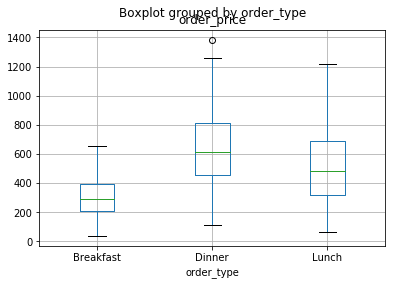

In [100]:
out.boxplot(column = 'order_price', by = 'order_type')

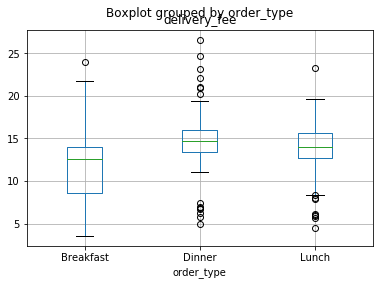

In [101]:
out.boxplot(column = 'delivery_fee', by = 'order_type')

The delivery fee seems to have a number of outliers. Therefore, we're going to work to remove these. In order to do this, we are going to create a linear model where our dependent variable is the delivery fee and the independent variables are weekday/weekend, time of day and branch. We will use the outlier dataset to train the model and will then use the model to predict. 

In [102]:
missing= pd.read_csv('Group017_missing_data.csv')

In [103]:
date=list(missing['date'])
time=list(missing['time'])

We next find if the order was placed on a weekday or weekend. We put 0 for weekday and 1 for weekend.

In [104]:
day=[]
for item in date:
    if datetime.strptime(item, '%Y-%m-%d').strftime('%A') in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        day.append(0)
    else:
        day.append(1)

In [105]:
missing['weekday/weekend']=day

Now we find what the time of day is. We put breakfast as 0, lunch as 1 and dinner as 2.

In [106]:
TOD=missing['order_type']
tod=[]
for item in TOD:
    if item=="Breakfast":
        tod.append(0)
    elif item=="Lunch":
        tod.append(1)
    else:
        tod.append(2)

In [107]:
missing['TimeOfDay']=tod

Finally we encode the branch code. We put NS as 0, TP as 1 and BK as 2.

In [108]:
branchcode=list(missing['branch_code'])
branchcode_index=[]
for item in branchcode:
    if item=='NS':
        branchcode_index.append(0)
    elif item=='TP':
        branchcode_index.append(1)
    else:
        branchcode_index.append(2)

In [109]:
missing['branchcode_index']=branchcode_index

We create the training dataset which comprises of all the not null data points where the customer loyalty is 0.

In [110]:
missing_traindata=missing[missing['customerHasloyalty?']==0].dropna()

In [111]:
missing_traindata = missing_traindata.drop(['order_id','branch_code', 'date', 'time', 'order_type', 'order_items', 'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?'],axis=1)

Next we create our model.

In [112]:
lm_for_out = LinearRegression()

In [113]:
lm_for_out.fit(missing_traindata[[x for x in missing_traindata.columns if x != 'delivery_fee']],missing_traindata['delivery_fee']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Next we need to use the model to predict for the outlier file. We first need to create all the necessary attributes in the same way we created it for the missing dataset.

In [114]:
date=list(out['date'])
time=list(out['time'])

In [115]:
day=[]
for item in date:
    if datetime.strptime(item, '%Y-%m-%d').strftime('%A') in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        day.append(0)
    else:
        day.append(1)

In [116]:
out['weekday/weekend']=day

In [117]:
TOD=out['order_type']
tod=[]
for item in TOD:
    if item=="Breakfast":
        tod.append(0)
    elif item=="Lunch":
        tod.append(1)
    else:
        tod.append(2)

In [118]:
out['TimeOfDay']=tod

In [119]:
out['branchcode_index']=branchcode_index

In [120]:
loyalty=out['customerHasloyalty?']

We finally predict the values and store them as a list in pred

In [121]:
pred=list(lm_for_out.predict(out.drop(['order_id','branch_code', 'date', 'time', 'order_type', 'order_items', 'order_price', 'customer_lat', 'customer_lon', 'delivery_fee', 'customerHasloyalty?'],axis=1))) 

Now we need to take the customer loyalty into account. We do this by dividing the predicted value by 2 where the customer loyalty is 1

In [122]:
for i in range(500):
    if loyalty[i]==1:
        pred[i]=pred[i]/2

In [123]:
out['pred_deliveryfee']=pred #adding to the dataframe to compare

In [124]:
out

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekday/weekend,TimeOfDay,branchcode_index,pred_deliveryfee
0,ORDA04354,2018-07-15,14:25:21,Lunch,BK,"[('Salad', 1), ('Fries', 7)]",101.20,-37.817296,144.987975,0,5.918,14.068446,1,1,0,13.621545
1,ORDB02723,2018-01-23,08:40:33,Breakfast,TP,"[('Pancake', 4), ('Cereal', 4)]",181.00,-37.817335,144.962208,0,7.904,11.053223,0,0,1,12.378904
2,ORDB04984,2018-03-11,10:11:49,Breakfast,TP,"[('Eggs', 9), ('Coffee', 9), ('Cereal', 5), ('...",419.00,-37.806582,144.962905,0,9.007,13.251034,1,0,0,14.927305
3,ORDJ03820,2018-02-27,09:51:32,Breakfast,TP,"[('Pancake', 4), ('Eggs', 8), ('Cereal', 5), (...",453.00,-37.809812,144.976242,0,9.231,17.764767,0,0,0,13.232824
4,ORDZ06038,2018-03-08,10:11:49,Breakfast,NS,"[('Cereal', 9), ('Eggs', 7), ('Pancake', 4)]",440.00,-37.808184,144.973174,0,7.119,12.297550,0,0,0,11.847885
5,ORDI06378,2018-07-29,14:55:46,Lunch,NS,"[('Salad', 10), ('Chicken', 9), ('Steak', 3), ...",722.00,-37.812086,144.973860,0,7.625,14.761605,1,1,1,14.757164
6,ORDK01822,2018-11-19,18:38:52,Dinner,BK,"[('Salmon', 4), ('Fish&Chips', 1), ('Pasta', 6)]",364.00,-37.816728,145.008977,0,3.879,11.055032,0,2,2,11.195467
7,ORDJ07592,2018-07-19,14:35:29,Lunch,TP,"[('Chicken', 6), ('Fries', 6), ('Steak', 1), (...",402.00,-37.809496,145.010117,0,12.256,15.011588,0,1,0,15.936304
8,ORDX09181,2018-12-12,19:29:34,Dinner,BK,"[('Fish&Chips', 1), ('Pasta', 5), ('Salmon', 5)]",377.50,-37.807869,144.980334,0,5.973,13.454108,0,2,2,12.568602
9,ORDZ06187,2018-01-13,08:20:16,Breakfast,NS,"[('Eggs', 7), ('Cereal', 1), ('Pancake', 4), (...",347.00,-37.821595,144.945657,1,9.996,8.309077,1,0,0,7.787920


In [125]:
real=out['delivery_fee']

Next, we find the residual values by finding the difference between the predicted and the real delivery fee

In [126]:
residual= []
for item in range(500):
    residual.append(abs(pred[item]-real[item]))

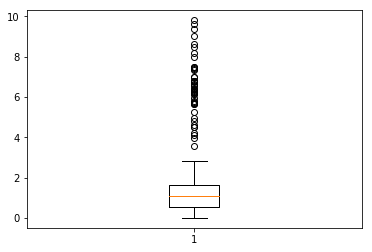

In [127]:
plt.boxplot(residual)
plt.show()

From the boxplot of the residuals, we see that there are a number of outliers. These are the values we will remove because they are unexplained. We know that the upper bound is value past the third quartile by 1.5*interquartile range and the lower bound is the value past the first quartile by 1.5*interquartile range.

In [128]:
Q1=np.percentile(residual, 25) #first quartile is the 25th percentile

In [129]:
Q3=np.percentile(residual, 75) #third quartile is the 75th percentile

In [130]:
IQR= Q3-Q1 #interquartile range is the third minus the first quartile

In [131]:
upper= Q3+1.5*IQR

In [132]:
lower= Q1-1.5*IQR

Next we find the indices where of the values that do not lie within the upper and lower bounds.

In [133]:
li=[]
for i in range(500):
    if residual[i]<upper and residual[i]>lower:
        continue
    else:
        li.append(i)


We see that 49 points are outliers

In [134]:
len(li)

49

We finally remove these values.

In [135]:
out=out.drop(li)

In [136]:
out=out.drop(['weekday/weekend','TimeOfDay','branchcode_index','pred_deliveryfee'], axis=1)

We have now removed the outliers in our data.

In [137]:
out.to_csv('Group017_outlier_data_solution.csv', index=False)

### 3. Missing Data

In [138]:
missing= pd.read_csv("Group017_missing_data.csv")

In [139]:
missing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                400 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


From the above output, we can see that there are three columns in the missing dataset that contain null values- these are the branch_code, the distance_to_customer_KM and the delivery_fee. Each have 50 missing values. We will discuss ways in which to find values for these below:

#### a. branch_code

In [140]:
missing['branch_code'].unique()

array(['NS', 'TP', nan, 'BK'], dtype=object)

From the above output, we can see that there are three distinct values that the branch_code can take- NS, TP and BK. We noticed that the fourth character of the order_id can be used to determine which branch the order came from.

In [141]:
new=missing[['order_id', 'branch_code']].dropna()  #creating a dataframe with just the order_id and branch_code
new['order_id']= new.order_id.str.slice(3,4) #getting only the fourth character of the order_id

In [142]:
new[new['branch_code'] == 'NS'].order_id.unique() #finding out the distinct fourth character for NS

array(['C', 'Z', 'I'], dtype=object)

In [143]:
new[new['branch_code'] == 'TP'].order_id.unique() #finding out the distinct fourth character for TP

array(['B', 'Y', 'J'], dtype=object)

In [144]:
new[new['branch_code'] == 'BK'].order_id.unique() #finding out the distinct fourth character for BK

array(['K', 'X', 'A'], dtype=object)

From the above code we can see that the distinct values for NS are C, Z and I. For TP we have B, Y, and J and for BK we have K, X and A. Using this information, we can check each of the missing values corresponding order_id and determine which branch it is.

In [145]:
missing['new']= missing.order_id.str.slice(3,4) #creating a new column of the fourth character from the order_id

In [146]:
#the below code substitues the corresponding branch_code based on the fourth character of the order_id for NS
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'C'), 'branch_code']='NS'
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'Z'), 'branch_code']='NS'
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'I'), 'branch_code']='NS'

In [147]:
#the below code substitues the corresponding branch_code based on the fourth character of the order_id for TP
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'B'), 'branch_code']='TP'
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'Y'), 'branch_code']='TP'
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'J'), 'branch_code']='TP'

In [148]:
#the below code substitues the corresponding branch_code based on the fourth character of the order_id for BK
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'K'), 'branch_code']='BK'
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'X'), 'branch_code']='BK'
missing.loc[(missing['branch_code'].isnull()) & (missing.new == 'A'), 'branch_code']='BK'

In [149]:
missing['branch_code'].describe()

count     500
unique      3
top        TP
freq      170
Name: branch_code, dtype: object

In [150]:
missing=missing.drop(['new'], axis=1) #deleting the newly created column

In [151]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


from the above output, we can see that every entry now has a branch_code

#### b. distance_to_customer_KM

The second item we need to deal with is the distance_to_customer_KM. In order to find this, we need to use the Djikstra algorithm to find the shortest path. The branches, nodes and edges files contain critical information such as the nodes of each latitude and logitude and the distance between two nodes. 

In [152]:
branches= pd.read_csv("branches.csv") #reading in the branches file

In [153]:
nodes=pd.read_csv("nodes.csv") #reading in the nodes file

In [154]:
edges= pd.read_csv("edges.csv") #reading in the edges file

In [155]:
branches.head()

,branch_code,branch_name,branch_lat,branch_lon
0,NS,Nickolson,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450


In [156]:
nodes.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [157]:
edges.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


Next, we can find the node of the various branches by finding the corresponding latitude and logitude in the nodes file. 

In [158]:
branch_nodes=pd.merge(branches, nodes, how='left', left_on=['branch_lat','branch_lon'], right_on = ['lat','lon']) #merging the two files such that only the required values remain
branch_nodes=branch_nodes.drop(['lat', 'lon'], axis=1) #dropping the extra columns 
branch_nodes.rename(columns={'node':'branch_node'}, inplace=True) #renaming 
branch_nodes

,branch_code,branch_name,branch_lat,branch_lon,branch_node
0,NS,Nickolson,-37.773803,144.983647,2455254505
1,TP,Thompson,-37.861835,144.905716,1390575046
2,BK,Bakers,-37.815834,145.046450,1889485053


We can do the same thing for the customer latitude and logitude provided in the missing data file. Thus, we merge the missing data file and the nodes file based on the customer latitude and logitude.

In [159]:
missing=pd.merge(missing, nodes, how='left', left_on=['customer_lat','customer_lon'], right_on = ['lat','lon']) #merging the two files such that only the required values remain
missing=missing.drop(['lat', 'lon'], axis=1) #dropping extra columns
missing.rename(columns={'node':'customer_node'}, inplace=True) #renaming
missing

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,customer_node
0,ORDC10049,2018-11-17,18:38:52,Dinner,NS,"[('Shrimp', 4), ('Fish&Chips', 5), ('Salmon', ...",938.50,-37.803762,144.956376,0,7.712,15.463563,780910447
1,ORDB10706,2018-12-14,19:29:34,Dinner,TP,"[('Shrimp', 10), ('Salmon', 2)]",622.00,-37.819169,145.015361,0,12.706,NaN,3676171107
2,ORDZ05899,2018-03-01,09:51:32,Breakfast,NS,"[('Eggs', 6), ('Pancake', 7), ('Coffee', 6), (...",472.75,-37.820828,144.968086,0,8.803,13.350417,847531521
3,ORDC09863,2018-09-17,16:37:10,Dinner,NS,"[('Salmon', 10), ('Shrimp', 2), ('Pasta', 8), ...",1088.00,-37.819722,144.969163,0,8.651,14.645880,456878881
4,ORDI10641,2018-02-27,09:51:32,Breakfast,NS,"[('Pancake', 7), ('Eggs', 4), ('Cereal', 2), (...",337.25,-37.811356,144.964172,0,7.617,12.899991,176704317
5,ORDB10107,2018-07-15,14:25:21,Lunch,TP,"[('Steak', 5), ('Fries', 8), ('Burger', 7), ('...",845.60,-37.800146,144.962552,0,9.742,14.720099,2185303481
6,ORDZ08939,2018-04-27,11:43:05,Breakfast,NS,"[('Eggs', 7), ('Coffee', 1), ('Cereal', 8), ('...",547.75,-37.801006,144.987484,0,7.771,12.870764,2337839881
7,ORDI04214,2018-05-11,12:13:31,Lunch,NS,"[('Salad', 7), ('Burger', 10)]",430.40,-37.826287,144.952088,0,10.165,15.815149,2421601621
8,ORDK01026,2018-11-25,18:49:00,Dinner,BK,"[('Pasta', 7), ('Salmon', 1)]",233.50,-37.820207,144.981560,0,6.695,15.947793,575524478
9,ORDZ05557,2018-01-05,08:00:00,Breakfast,NS,"[('Coffee', 1), ('Cereal', 2)]",49.50,-37.812345,144.936839,1,10.124,7.202697,634783575


Now, we can merge the missing data file and the branch_nodes in order to get a column of the corresponding nodes of each branch.

In [160]:
missing=pd.merge(missing, branch_nodes, how='left', left_on=['branch_code'], right_on = ['branch_code']) #merging the two files such that only the required values remain

In [161]:
missing.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,customer_node,branch_name,branch_lat,branch_lon,branch_node
0,ORDC10049,2018-11-17,18:38:52,Dinner,NS,"[('Shrimp', 4), ('Fish&Chips', 5), ('Salmon', ...",938.50,-37.803762,144.956376,0,7.712,15.463563,780910447,Nickolson,-37.773803,144.983647,2455254505
1,ORDB10706,2018-12-14,19:29:34,Dinner,TP,"[('Shrimp', 10), ('Salmon', 2)]",622.00,-37.819169,145.015361,0,12.706,NaN,3676171107,Thompson,-37.861835,144.905716,1390575046
2,ORDZ05899,2018-03-01,09:51:32,Breakfast,NS,"[('Eggs', 6), ('Pancake', 7), ('Coffee', 6), (...",472.75,-37.820828,144.968086,0,8.803,13.350417,847531521,Nickolson,-37.773803,144.983647,2455254505
3,ORDC09863,2018-09-17,16:37:10,Dinner,NS,"[('Salmon', 10), ('Shrimp', 2), ('Pasta', 8), ...",1088.00,-37.819722,144.969163,0,8.651,14.645880,456878881,Nickolson,-37.773803,144.983647,2455254505
4,ORDI10641,2018-02-27,09:51:32,Breakfast,NS,"[('Pancake', 7), ('Eggs', 4), ('Cereal', 2), (...",337.25,-37.811356,144.964172,0,7.617,12.899991,176704317,Nickolson,-37.773803,144.983647,2455254505


Now, to apply the networkx function, we create lists. The nodes_list which is a list of all the possible nodes and the edges_list which shows how the two nodes are connected and adds a corresponding weight (here distance in meters) to the edges.

In [162]:
nodes_list=list(nodes['node'])

In [163]:
edges_list=list(zip(edges.u, edges.v, edges['distance(m)']))

In [164]:
import networkx as nx

G=nx.Graph() #forming an empty graph
G.add_nodes_from(nodes_list) #plotting all the nodes on the empty graph
G.add_weighted_edges_from(edges_list) #plotting all the weighted edges onto the graph

Next, we create two lists, the source_list which shows the starting points(each branches nodes) and the target_list which shows the destination(each customers nodes). We only do this for the missing values, since thats what we want to find.

In [165]:
source_list=list(missing.loc[(missing['distance_to_customer_KM'].isnull())]['branch_node']) #gets the branch_nodes of all the rows with null distance_to_customer_KM
target_list=list(missing.loc[(missing['distance_to_customer_KM'].isnull())]['customer_node']) #gets the customer_nodes for all the rows with null distance_to_customer_KM

Next, we used the dijksta_path_length function to find out the distance. However, we found the distance in meters. Thus, we divide by 1000 to get the distance in kilometers.

In [166]:
dist=list() #empty list of distances
for i in range(len(source_list)):
    dist.append((nx.dijkstra_path_length(G, source_list[i], target_list[i]))/1000)
len(dist) #should be 50 since there are 50 missing values

50

We then substitute these values in the dataframe.

In [167]:
missing['distance_to_customer_KM'][missing['distance_to_customer_KM'].isnull()]=dist

/Users/nikitajohn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
missing=missing.drop(['branch_node', 'branch_lon', 'branch_lat', 'branch_name', 'customer_node' ], axis=1) #dropping the extra columns

In [169]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 50.8+ KB


From the above output, we can see that the 50 null values in the distance_to_customer_KM column, have now been filled.

#### c. delivery fee

The final item we need to investigate is the delivery fee. We know that the delivery fee depends on the branch, time of day that the order was placed, whether it was a weekday or a weekend, the distance_to_customer_KM and if the customer has loyalty. Thus a linear regression model could help us estimate these missing values.

In [170]:
missing.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDC10049,2018-11-17,18:38:52,Dinner,NS,"[('Shrimp', 4), ('Fish&Chips', 5), ('Salmon', ...",938.50,-37.803762,144.956376,0,7.712,15.463563
1,ORDB10706,2018-12-14,19:29:34,Dinner,TP,"[('Shrimp', 10), ('Salmon', 2)]",622.00,-37.819169,145.015361,0,12.706,NaN
2,ORDZ05899,2018-03-01,09:51:32,Breakfast,NS,"[('Eggs', 6), ('Pancake', 7), ('Coffee', 6), (...",472.75,-37.820828,144.968086,0,8.803,13.350417
3,ORDC09863,2018-09-17,16:37:10,Dinner,NS,"[('Salmon', 10), ('Shrimp', 2), ('Pasta', 8), ...",1088.00,-37.819722,144.969163,0,8.651,14.645880
4,ORDI10641,2018-02-27,09:51:32,Breakfast,NS,"[('Pancake', 7), ('Eggs', 4), ('Cereal', 2), (...",337.25,-37.811356,144.964172,0,7.617,12.899991


The first thing we need to do is to find out what day of the week the order was placed(Weekday or weekend). We can do this by using the date and time column and the datetime library. We create a list which contains the value 0 if the day of the week was a weekday and 1 for a weekend.

In [171]:
date=list(missing['date'])

In [172]:
time=list(missing['time'])

In [173]:
day=[]
for item in date:
    if datetime.strptime(item, '%Y-%m-%d').strftime('%A') in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']: #checking if weekday
        day.append(0)
    else:
        day.append(1)

Adding the list obtained to the dataframe

In [174]:
missing['weekday/weekend']=day

In [175]:
missing.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekday/weekend
0,ORDC10049,2018-11-17,18:38:52,Dinner,NS,"[('Shrimp', 4), ('Fish&Chips', 5), ('Salmon', ...",938.50,-37.803762,144.956376,0,7.712,15.463563,1
1,ORDB10706,2018-12-14,19:29:34,Dinner,TP,"[('Shrimp', 10), ('Salmon', 2)]",622.00,-37.819169,145.015361,0,12.706,NaN,0
2,ORDZ05899,2018-03-01,09:51:32,Breakfast,NS,"[('Eggs', 6), ('Pancake', 7), ('Coffee', 6), (...",472.75,-37.820828,144.968086,0,8.803,13.350417,0
3,ORDC09863,2018-09-17,16:37:10,Dinner,NS,"[('Salmon', 10), ('Shrimp', 2), ('Pasta', 8), ...",1088.00,-37.819722,144.969163,0,8.651,14.645880,0
4,ORDI10641,2018-02-27,09:51:32,Breakfast,NS,"[('Pancake', 7), ('Eggs', 4), ('Cereal', 2), (...",337.25,-37.811356,144.964172,0,7.617,12.899991,0


Next, we can use the order_type column to determine the time of day. We use 0 as Breakfast, 1 as Lunch and 2 as Dinner.

In [176]:
TOD=missing['order_type']
tod=[]
for item in TOD:
    if item=="Breakfast":
        tod.append(0)
    elif item=="Lunch":
        tod.append(1)
    else:
        tod.append(2)

In [177]:
missing['TimeOfDay']=tod #adding this to the dataframe

In [178]:
missing.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekday/weekend,TimeOfDay
0,ORDC10049,2018-11-17,18:38:52,Dinner,NS,"[('Shrimp', 4), ('Fish&Chips', 5), ('Salmon', ...",938.50,-37.803762,144.956376,0,7.712,15.463563,1,2
1,ORDB10706,2018-12-14,19:29:34,Dinner,TP,"[('Shrimp', 10), ('Salmon', 2)]",622.00,-37.819169,145.015361,0,12.706,NaN,0,2
2,ORDZ05899,2018-03-01,09:51:32,Breakfast,NS,"[('Eggs', 6), ('Pancake', 7), ('Coffee', 6), (...",472.75,-37.820828,144.968086,0,8.803,13.350417,0,0
3,ORDC09863,2018-09-17,16:37:10,Dinner,NS,"[('Salmon', 10), ('Shrimp', 2), ('Pasta', 8), ...",1088.00,-37.819722,144.969163,0,8.651,14.645880,0,2
4,ORDI10641,2018-02-27,09:51:32,Breakfast,NS,"[('Pancake', 7), ('Eggs', 4), ('Cereal', 2), (...",337.25,-37.811356,144.964172,0,7.617,12.899991,0,0


Next, we need to get the branch_codes as a numeric categorical data. We assign NS as 0, TP as 1 and BK as 2

In [179]:
branchcode=list(missing['branch_code'])
branchcode_index=[]
for item in branchcode:
    if item=='NS':
        branchcode_index.append(0)
    elif item=='TP':
        branchcode_index.append(1)
    else:
        branchcode_index.append(2)

In [180]:
missing['branchcode_index']=branchcode_index #adding this to the dataframe

From the already filled data, we can create a linear model that we will use to predict the missing values.

In [181]:
missing_traindata=missing.dropna(subset=['delivery_fee']) #dropping the null values

We remove all the columns that aren't required for this model.

In [182]:
lm_fitting_df = missing_traindata.drop(['order_id','branch_code', 'date', 'time', 'order_type', 'order_items', 'order_price', 'customer_lat', 'customer_lon'],axis=1)
lm_fitting_df

,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekday/weekend,TimeOfDay,branchcode_index
0,0,7.712,15.463563,1,2,0
2,0,8.803,13.350417,0,0,0
3,0,8.651,14.645880,0,2,0
4,0,7.617,12.899991,0,0,0
5,0,9.742,14.720099,1,1,1
6,0,7.771,12.870764,0,0,0
7,0,10.165,15.815149,0,1,0
8,0,6.695,15.947793,1,2,2
9,1,10.124,7.202697,0,0,0
10,0,10.842,16.911448,0,2,0


In [183]:
lm_for_impute = LinearRegression() 

We next fit a regression model such that the delivery fee is the dependent variable and everything else are the independent variables.

In [184]:
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'delivery_fee']],lm_fitting_df['delivery_fee']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [185]:
missing[missing['delivery_fee'].isnull()].head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekday/weekend,TimeOfDay,branchcode_index
1,ORDB10706,2018-12-14,19:29:34,Dinner,TP,"[('Shrimp', 10), ('Salmon', 2)]",622.00,-37.819169,145.015361,0,12.706,NaN,0,2,1
16,ORDZ09244,2018-10-11,17:17:44,Dinner,NS,"[('Fish&Chips', 8), ('Pasta', 10), ('Salmon', ...",1017.00,-37.812044,144.953542,0,8.447,NaN,0,2,0
19,ORDI03482,2018-09-10,16:16:54,Dinner,NS,"[('Salmon', 9), ('Fish&Chips', 2)]",439.00,-37.807883,144.973187,0,7.084,NaN,0,2,0
36,ORDK06507,2018-12-27,20:00:00,Dinner,BK,"[('Shrimp', 2), ('Fish&Chips', 10)]",458.00,-37.819563,144.952704,0,8.834,NaN,0,2,2
49,ORDB01954,2018-02-10,09:10:59,Breakfast,TP,"[('Pancake', 1), ('Coffee', 6), ('Eggs', 5)]",179.25,-37.804264,144.971394,0,9.851,NaN,1,0,1


We can see how the model works by the following code. It shows the predicted values from the model which can be compared to the actual values

In [186]:
lm_for_impute.predict(missing.drop(['order_id','branch_code', 'date', 'time', 'order_type', 'order_items', 'order_price', 'customer_lat', 'customer_lon', 'delivery_fee'],axis=1)) 

array([15.61041912, 16.51004648, 13.01746013, 14.26987401, 12.34549591,
       16.03399947, 12.43274927, 14.45840952, 14.91958577,  7.42976223,
       15.51125142, 13.23102464, 15.3790165 , 16.40419811, 15.07046811,
        5.26995817, 14.15429163,  7.85292786, 17.01191705, 13.38204269,
       14.93957191, 17.05837663, 14.8595981 , 15.42544251, 12.95405287,
       14.58760598, 14.72755131, 14.63928435, 15.08554406, 12.72846792,
       15.31222591,  6.90615605, 12.73135324, 13.98461268, 12.75618063,
       13.40980513, 14.258937  , 12.49560342, 12.80377337, 13.88664402,
       13.18521762, 13.52006657, 15.455435  , 12.760763  , 12.31896609,
       14.78446822, 14.90152504, 15.3195753 , 15.07999783, 15.42648968,
       12.70985676, 13.76879532, 15.14218594, 14.23335758, 11.91019026,
       14.1489707 , 14.0232396 , 15.18014682, 12.323535  , 10.59925919,
       15.37187267, 13.0740819 , 13.02496139, 13.7558137 , 12.86741581,
       13.79140881, 14.38296835, 13.71227301, 15.63172746, 13.95

Next, we substitute the predicted values where the value of delivery fee is missing.

In [187]:
missing['delivery_fee'][missing['delivery_fee'].isnull()] = lm_for_impute.predict(missing.drop(['order_id','branch_code', 'date', 'time', 'order_type', 'order_items', 'order_price', 'customer_lat', 'customer_lon', 'delivery_fee'],axis=1)) 

/Users/nikitajohn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We can check the accuracy of our model using the following code.

In [188]:
X_train, X_test, y_train, y_test = train_test_split(missing[['branchcode_index', 'TimeOfDay', 'weekday/weekend','distance_to_customer_KM', 'customerHasloyalty?']] ,missing['delivery_fee'],random_state=111)

In [189]:
lm_for_impute.fit(X_train,y_train)

print ('r-squared for this model = ',lm_for_impute.score(X_test,y_test))

r-squared for this model =  0.5992347247629239


We see that the R squared value is approximately 60% which is a little low, indicating that this model may not be very good.

In [190]:
missing=missing.drop(['weekday/weekend', 'TimeOfDay', 'branchcode_index'], axis=1) #dropping the extra columns created

In [191]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 50.8+ KB


We can now see that the entire dataset is completely filled and there are no null values.

In [192]:
missing.to_csv('Group017_missing_data_solution.csv', index=False)

## 3. Summary

This assessment measured the understanding of EDA techniques using Python. We were able to improve our understanding of outliers, missing data and other data anomalies and learnt of various methods to correct these. 

The process of writing the program was long but very interesting. The code runs with no errors and gives the desired output. While working on this assignment we were able to implement concepts that were covered in the lectures and tutorials.

## 4. References

- networkx.algorithms.shortest_paths.weighted.dijkstra_path_length — NetworkX 2.3 documentation. (2019). Retrieved 7 October 2019, from https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path_length.html#networkx.algorithms.shortest_paths.weighted.dijkstra_path_length

- Python, R. (2019). Linear Regression in Python – Real Python. Retrieved 7 October 2019, from https://realpython.com/linear-regression-in-python/


- Linear algebra (numpy.linalg) — NumPy v1.17 Manual. (2019). Retrieved 7 October 2019, from https://docs.scipy.org/doc/numpy/reference/routines.linalg.html